# [AI 이노베이션 스퀘어] 11기 기본 저녁반
- github: https://github.com/hysKim1/AI_Fundamental
    -  [파이썬 공식문서]https://docs.python.org/ko/3/
    - [Numpy 공식문서]https://numpy.org/devdocs/
    
---
Pandas 전처리

1. [인공지능 개론](#인공지능-개론) <br>
2. [기계학습 맛보기](#기계학습-맛보기)<br>
      2.1 [K-NN(k-Nearest Neighbors)](#K-NN(k-Nearest-Neighbors))<br>
      2.2 [결측치 처리의 중요성](#결측치-처리의-중요성)<br>
      2.3 [DESCR](#DESCR)<br>
      2.4 [data](#data)<br>
      2.5 [feature_names](#feature_names)<br>
      2.6 [target](#target)<br>


3. [ 결측치 ](결측치)    
      3.1 [존재여부 확인:isna,isnull](#결측치-존재여부-확인)<br>
      3.2 [시각화:mino.matrix &bar](#결츨지-존재여부-시각화)<br>
      3.2 [결측지 제거](#결측지-제거)<br>
      3.3 [결측치 대체:fillna](#결측치-대체)<br>
      
4. [데이터 타입 변환](#데이터-타입-변환)<br> 
      4.1 [map](#map)<br>
      .2 [category](#category)<br>
      4.3 [astype](#astype)<br>


## pandas 전처리
- 인공지능(AI)를 한 Pandas를 이용한 데이터 전처리
- Tidy DAta 논문에서 저자가 전처리는 전체과정에서 80% 소요될 정도로 중요

### 인공지능 개론

-   학문적 적립이 되기 이전 다양한 개념을 넣어서 정의가 다름
    - 대표적 정의: 컴퓨터가 지능을 갖어 지능적 서비스를 함
        >  모든것이 **연결**되고 보다 **지능적인** 사회로의 진화
            추천 시스템도 인공지능
                     - 다보스 포럼 2016-
                          
#### 제 4차 산업혁명 (물리에서 정신적 변화)
   - 인간의 정신적 영역 해결
   - 복잡한 계산,저장 가능.
   - 3차 사업혁명
        - 지능 + 정보

- 인공(artificial)- **자동화(반복)**함
- 지능: 컴퓨터가 인간과 비슷한 사고 가능.

> * DIKW: 데이터(Data) - 정보(Information) - **지식(Knowledge)** - 지혜(Wisdom)
    - 지식이 모이면 지능(이해)인식_(지식 요구),추론,학습,생성 분류)

- 기계가 지식을 통해서 지능적인 부분을 할 수 있음(**광범위**함)
    - 컴퓨터에서 만들어지는 기능구현, 문제해결
    - 학습 : 공부시켜서 지능적인 일 할수 있도록 시킴
    - computing model : 컴퓨터가 문제를 해결하기 위해서 컴퓨터가 이해 할 수있는 체계 필요
    - 단순 반복 불가하고 풀 수 없는 문제 
    - 학습을 통해서 스스로 판단하여 의사결정을 도움 -> 딥러닝

### 딥러닝이 인기 있는 이유
- big data: 동영상, 비정형 데이타, 실시간 데이터
- 새로운 머신 러닝 테크닉
- 하드웨어 발달 : GPU
    - performance 고려할 필요가 적어짐( 예. 데이터형 작은것 사용)

### 기계학습
- Machine Learning
- computational model 에게 데이터를 주면 사람이 주는 가이드라인에 의해서 데이터에 가장 적합한 규칙/패턴을 찾음
- 찾은것을 학습이라함

## 기계학습 맛보기
###  K-NN(k-Nearest Neighbors)
#### k- 최근접 이웃 분류

In [1]:
import pandas as pd

### iris(붓꽃) 데이터 세트
- 총 150에 각 클래스별로 50개
- 4개의 attribures 있음
    - 꽃받침, 꽃잎의 각 길이,넓이
- 각 attribute 별로 가이드라인(라벨,타겟)을 주어 학습하도록 함
- 모델은 학습하여 특징별로 예측 가능
    - 특징 4가지가 타겟을 잘 대표하도록 학습시켜야함
    
    
* Iris 데이터 세트는 seaborn 과  sklearn 패키지 두곳에 있음.
    - 유명한 연습용 데이터세트라는 의미
        - sklearn : dictionary 형태(다양한 정보 포함)
        - seaborn : DataFrame

In [2]:
from sklearn.datasets import load_iris #snake 방식은 class
iris=load_iris()

In [4]:
import seaborn as sns

In [5]:
iris = sns.load_dataset("iris")  #DataFrame
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [6]:
#!pip install mglearn  #설치필요한 경우 설치

In [7]:
from sklearn.neighbors import KNeighborsClassifier
import mglearn

iris  붗꽃 데이터를 불러와서 k - 최근접 이웃 분류
- k번째로 가까운 데이터로 분류

가이드 라인: 제일 가까운 데이터 한개만 참조해서 분류.

C:\Users\AI02\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


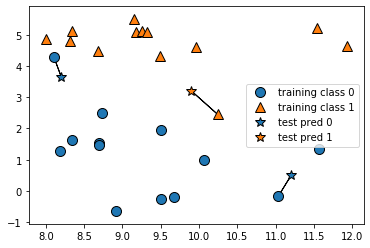

In [8]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

1. 가이드 라인: 5번째 가까운 최근접한 데이터 선택   
2. 가장 근저한 데이터중 voting을 통해서 가장 많은 데이터에 따라서 분류됨.
    - 예. 좌측의 별(테스트 데이터)은 3개의 삼각형,2개의 원으로 분류되어 과반수에 의해서 삼각형 클래스로 분류.

C:\Users\AI02\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


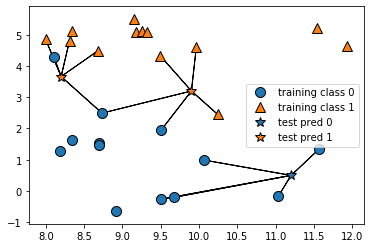

In [9]:
mglearn.plots.plot_knn_classification(n_neighbors=5)

1. 가이드 라인: 5번째로 가까운 최근접한 데이터 (사용자 지정 매개변수  k=5) 

In [10]:
knn = KNeighborsClassifier(5)

2. 각 행마다 4개의 attributes 인 sepal_lengt&width, petal length&width를 각 종류(species)/타겟값 모델 피팅.

In [11]:
iris.iloc[:,:-1] #attributes 4개 선택

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [12]:
knn.fit(iris.iloc[:,:-1],iris.species)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

똑같은 가이드라인이라도 다른 이유는 초기값 설정시에 랜덤으로 설정하기 때문

In [13]:
knn.predict([[1,2,3,4]])

array(['versicolor'], dtype=object)

### 결측치 처리의 중요성
- 결측치가 있으면 머신러닝/기계학습에서 대부분이 작동안함.
- 결측치 제거/값 대체 필요.
    * 하나의 값에 None 을 할당, 데이터를  150개였는데 149개로 변함.

In [14]:
iris.iat[10,0]=None
iris.iat[10,0]

nan

In [15]:
iris.info()  # sepal_length  149 개.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


- 각 행마다 sepal_length, width, petal length&width를 각 종류(species)/타겟값 모델 피팅.

* ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
    - 값에러 : 입력값에 NaN결측치, infinity,너무 큰 데이터가 있음.

In [16]:
knn = KNeighborsClassifier(5) #k=5
knn.fit(iris.iloc[:,:-1],iris.species) #결츨치 -> valueError

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [17]:
from sklearn.datasets import load_iris #snake 방식은 class
iris=load_iris()

In [18]:
print(iris)    #array로 데이터 외의 다양한 정보가 dictionary형태로 포함

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

위에 dictionary형태로 저장되어있어서 키값 이용해서 접근 가능

In [19]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [20]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
dir(iris) #위의 키값들과 동일(순서만 상이)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

dir통해 나온  'DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names'를 알아볼 예정

### DESCR
- 데이터에 대한 설명(DESCRiption)

In [22]:
iris.DESCR #\n 나오면 print ( ) 이용

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ============== ==== =

### data
- data의 데이터값
- iris의 data없이 치는 경우에는 데이터 외의 값들도 포함하는 dictionary 형태

In [23]:
iris.data #Numpy array iris attribute 데이터 값

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

python은 타입캐스팅이 없음.
데이터를 인스턴스화 하는 방식 

In [24]:
type(iris.data)

numpy.ndarray

### feature_names
- attributes/feature/input 의 이름

In [26]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

### target
- 각 attributes와 쌍이 되는 target/output
    - 데이터에서는 종류 3가지의 꽃: 0,1,2

In [27]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

sklearn에서 불러온 iris데이터를 array에서 DataFrame으로 변환하여 확인
   - 컬럼명 없음
   - target 없음
   - attributes 값만 있음.

In [28]:
iris2=pd.DataFrame(iris.data)
iris2

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


1. feature_names 리스트를 df 컬럼 명으로 지정

In [29]:
iris2=pd.DataFrame(iris.data, columns=iris.feature_names)
iris2.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


2. 방법 1) iris데이터프레임에 target 열을 생성하여 iris.target 값 할당.

In [30]:
iris2['target']=iris.target

In [31]:
iris2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


2. 방법 2)attribute과 target 의 DataFrame 만들고 결합 
    - `concat()`

In [32]:
target=pd.DataFrame(iris.target, columns=['target'])

In [33]:
iris2=pd.DataFrame(iris.data, columns=iris.feature_names)
x=pd.concat([iris2,target],axis=1)
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


3. 데이터 타입 변환
    - ` map({ 이전값 : 대체하고싶은 값 } )`
    - series의 값(인덱싱을 통해서 series형으로)와 해당 입력 값을 맵핑하여 값을 대치함.
    - function, dictionary형태 이용

In [34]:
x.target=x.target.map({0:'setosa',1:'versicolor',2:'virginica'}) #0,1,2 -> setosa,versicolor,virginica
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


## 결측치
### mpg(연비) 데이터 세트

In [35]:
mpg=sns.load_dataset('mpg')

In [36]:
dir(mpg)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_e

In [37]:
mpg

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


 ### 결측치 처리 
 ### 결측치 존재여부 확인
 
    - horsepower    392개로 나머지보다 6개 적음 (6개 결측치 존재함을 확인)

In [42]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


 ### isna
 ### isnull
 -
  결측치가 있는지 여부를 boolean 으로 가져옴
    - True ==1 , False== 0 
    - 총 합은 true의 갯수

In [43]:
mpg.horsepower.isna().sum()

6

In [40]:
mpg.horsepower.isnull().sum()

6

- boolean indexing 으로 해당 값 추출

In [41]:
mpg[mpg.horsepower.isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [117]:
#!pip install missingno #패키지 설치완료

In [118]:
import missingno as mino

In [120]:
dir(mino) #matrix

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

### 결측치 존재 여부 시각화
### mino.matrix
- 6개의 결측치: 6개의 선,그래프
    - 결측치 근처의 유사값(같은 차종)으로 덮어쓰기 (제일 우아함)
- 여러가지 다른 방법도있음

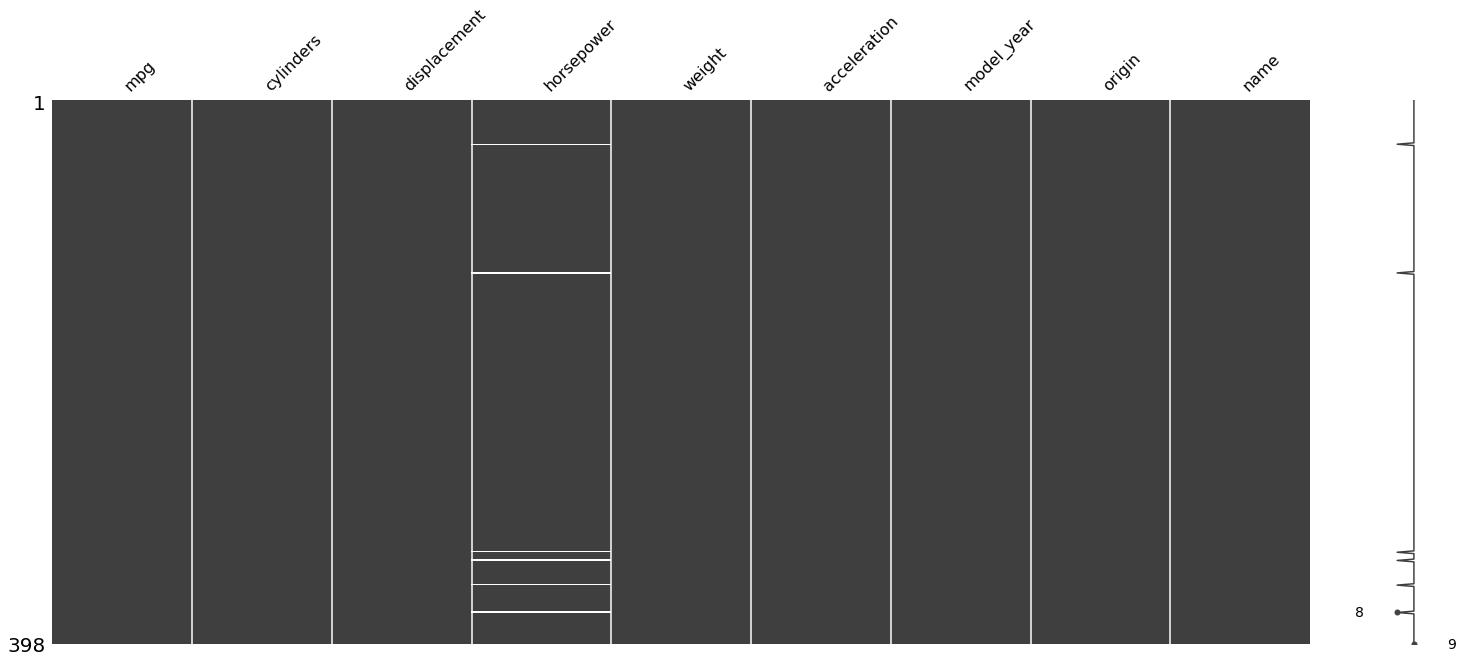

In [122]:
mino.matrix(mpg)

### mino.bar
- 데이터 갯수만큼 바 그래프 그림.
    - 해당 데이터에서는 전체에 비해서 결측치 크기가 작아서 비교하기 어려움

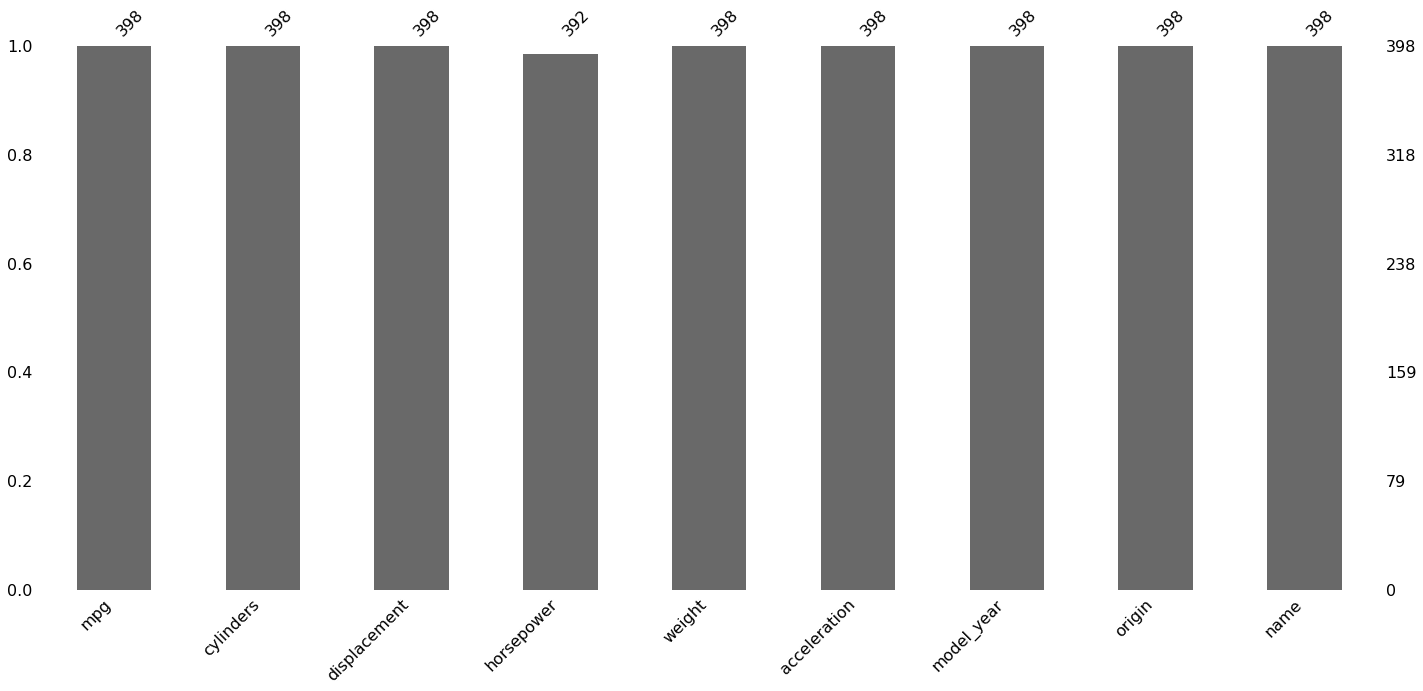

In [124]:
mino.bar(mpg)

- heatmap(2개의 범주형 자료 집계값을 생삭으로 시각화), dendrogram (계층적관계 표현). geoplot(공간시각화) 은 해당 데이터 형태에 맞지 않음.
 추후에 다룰 예정

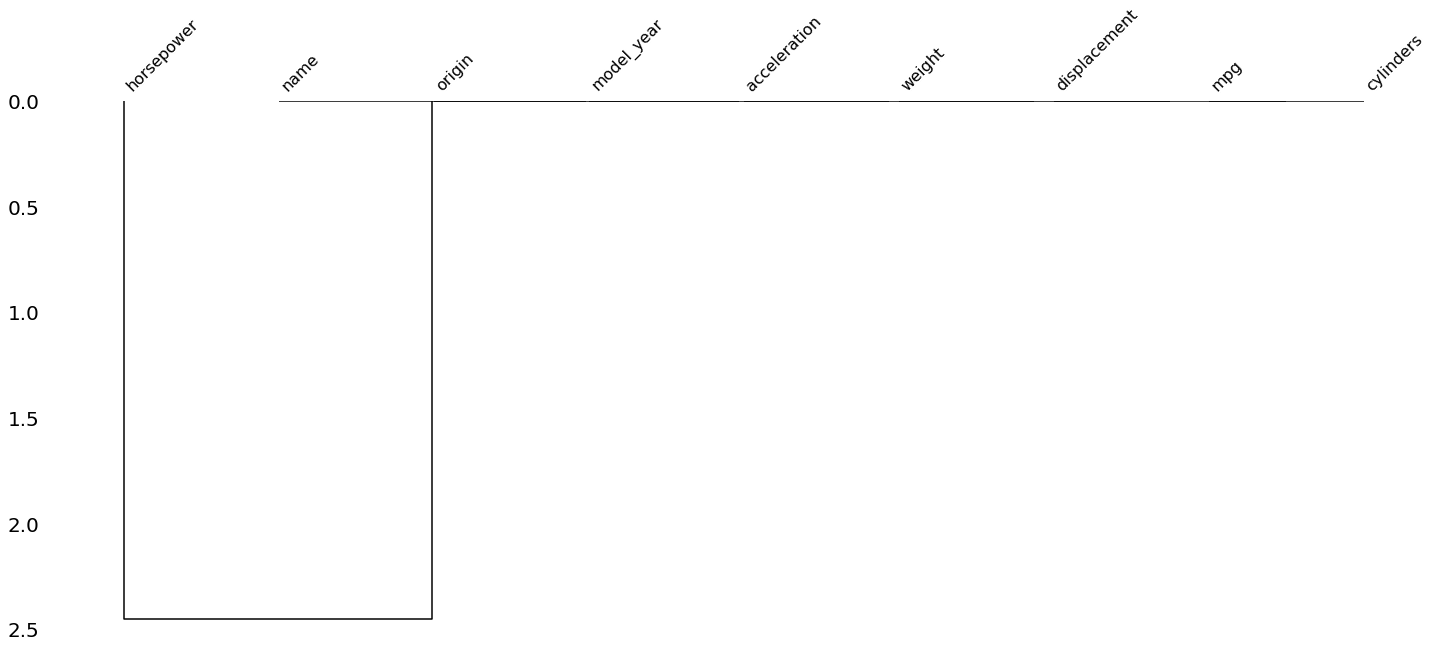

In [126]:
mino.dendrogram(mpg)

그래프마다 적합한 데이터 형태가 다르기 때문에 어떤 데이터들은 error, 이상한 그림 

In [132]:
!pip install -U pip --user

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [135]:
!pip install geoplot --user

  Using cached geoplot-0.4.1-py3-none-any.whl (28 kB)
  Using cached Cartopy-0.18.0.tar.gz (14.4 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\AI02\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\AI02\\AppData\\Local\\Temp\\pip-install-xam7r9lh\\cartopy\\setup.py'"'"'; __file__='"'"'C:\\Users\\AI02\\AppData\\Local\\Temp\\pip-install-xam7r9lh\\cartopy\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\AI02\AppData\Local\Temp\pip-pip-egg-info-xn_dm4mx'
         cwd: C:\Users\AI02\AppData\Local\Temp\pip-install-xam7r9lh\cartopy\
    Complete output (3 lines):
    C:\Users\AI02\AppData\Local\Temp\pip-install-xam7r9lh\cartopy\setup.py:107: UserWarning: Unable to determine GEOS version. Ensure you have 3.3.3 or later installed, or installation may fail.
      '.'.join(str(v) for v in GEOS_MIN_VERSION), ))
    Proj 4.9.0 must be installed.
    ----------------------

In [134]:
mino.geoplot(mpg)  #Install geoplot <= 0.2.4 당황하지 말고 설치1

C:\Users\AI02\anaconda3\lib\site-packages\missingno\missingno.py:495: UserWarning: The 'geoplot' function has been deprecated, and will be removed in a future version of missingno. The 'geoplot' package has an example recipe for a more full-featured geospatial nullity plot: https://residentmario.github.io/geoplot/gallery/plot_san_francisco_trees.html
  "The 'geoplot' function has been deprecated, and will be removed in a future version "


ImportError: Install geoplot <= 0.2.4 (the package) for geoplot function support

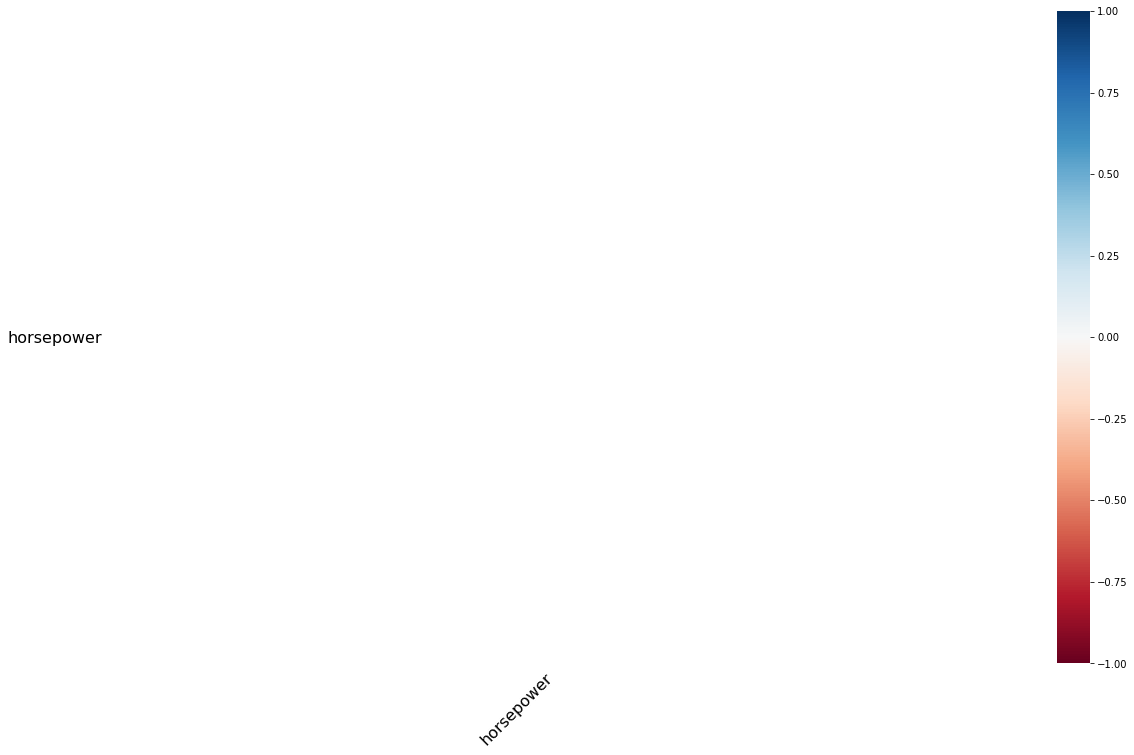

In [128]:
mino.heatmap(mpg)

### 결측치 처리
    - 결측치가 포함된 데이터를 제거?
    - 결측치를 다른 값으로 대체?
    
        
#### 결측치 제거
#### boolean indexing

In [115]:
mpg[mpg.horsepower.isnull()].index

Int64Index([32, 126, 330, 336, 354, 374], dtype='int64')

In [116]:
mpg.drop(index=mpg[mpg.horsepower.isnull()].index ) #

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


데이터가 작아서 데이터를 유지하는 방향으로 결정!
- 결측치를 값 으로 대체 
    - 과연 무슨 값으로 대체?

#### 결측치 대체
#### fillna


In [138]:
x=mpg[mpg.horsepower.isna()]
x

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [139]:
x.fillna(5) # 모든값을 5로 채움

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,5.0,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,5.0,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,5.0,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,5.0,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,5.0,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,5.0,3035,20.5,82,usa,amc concord dl


`fillna(method=' ')`
 - ffill, pad
     - 앞의 갚으로 채움
 - backfill, bfill
    - series 에서 사용 가능
    - 뒤의 값으로 채움


In [144]:
mpg.iloc[30:35,:]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
30,28.0,4,140.0,90.0,2264,15.5,71,usa,chevrolet vega 2300
31,25.0,4,113.0,95.0,2228,14.0,71,japan,toyota corona
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
33,19.0,6,232.0,100.0,2634,13.0,71,usa,amc gremlin
34,16.0,6,225.0,105.0,3439,15.5,71,usa,plymouth satellite custom


forwad: 32번 값으 ffill 통해서 31번의 값 95로 채움

In [146]:
mpg.horsepower.fillna(method='backfill')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [46]:
mpg.horsepower.fillna(method='bfill')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

backward: 32번 값을 bfill 통해서 33번 값 100으로 채움

In [148]:
mpg.horsepower.fillna(method='ffill')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [45]:
mpg.horsepower.fillna(method='pad')

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

## 데이터 타입 변환

In [149]:
import seaborn as sns

In [222]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


성별로 어떤날에 얼마만큼을 먹으면 얼마 만큼의 팁을 주는지 예측 모델 만들기 가능

In [198]:
tip_1=tips[['sex','day','total_bill','tip']] ## fancy indexing
tip_1

,sex,day,total_bill,tip
0,Female,Sun,16.99,1.01
1,Male,Sun,10.34,1.66
2,Male,Sun,21.01,3.50
3,Male,Sun,23.68,3.31
4,Female,Sun,24.59,3.61
...,...,...,...,...
239,Male,Sat,29.03,5.92
240,Female,Sat,27.18,2.00
241,Male,Sat,22.67,2.00
242,Male,Sat,17.82,1.75


iris dataset에서는 타겟값이 명목형이므로 classification 

KNeighborsRegressor: 타겟값이 수치형인 경우
- 타겟: tips(수치형)

In [183]:
from sklearn.neighbors import KNeighborsRegressor

In [184]:
knn=KNeighborsRegressor()

In [185]:
knn.fit(tip_1.iloc[:,:-1],tip_1.tip) #값 에러:모두 입력값 수치형이여야함.

ValueError: could not convert string to float: 'Female'

기본적으로 숫자형 데이터 이용 .
문자를 숫자로 변경 해야함

### map
- series의 값(인덱싱을 통해서 series형으로)와 해당 입력 값을 맵핑하여 값을 대치함.
    - function, dictionary형태 이용
- 값을 대체함

In [199]:
tip_1.sex=tip_1.sex.map({'Female':0,'Male':1})
tip_1

C:\Users\AI02\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,sex,day,total_bill,tip
0,0,Sun,16.99,1.01
1,1,Sun,10.34,1.66
2,1,Sun,21.01,3.50
3,1,Sun,23.68,3.31
4,0,Sun,24.59,3.61
...,...,...,...,...
239,1,Sat,29.03,5.92
240,0,Sat,27.18,2.00
241,1,Sat,22.67,2.00
242,1,Sat,17.82,1.75


In [197]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [200]:
tip_1.day=tip_1.day.map({'Thur':0,'Fri':1,'Sat':2,'Sun':3})

C:\Users\AI02\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [203]:
tip_1.day.value_counts()

2    87
3    76
0    62
1    19
Name: day, dtype: int64

In [202]:
tip_1.info

<bound method DataFrame.info of     sex day  total_bill   tip
0     0   3       16.99  1.01
1     1   3       10.34  1.66
2     1   3       21.01  3.50
3     1   3       23.68  3.31
4     0   3       24.59  3.61
..   ..  ..         ...   ...
239   1   2       29.03  5.92
240   0   2       27.18  2.00
241   1   2       22.67  2.00
242   1   2       17.82  1.75
243   0   0       18.78  3.00

[244 rows x 4 columns]>

입력값이 모두 수치형인경우 문제없이 학습됨

In [204]:
knn=KNeighborsRegressor() 

In [205]:
knn.fit(tip_1.iloc[:,:-1],tip_1.tip)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

### category
- 자동 수치 변환
category 데이터 타입은 cat.codes 통해서 가능

category  와 obejct 차이점
- obejct는 몇개의 데이터 들어올지모름
- category 는 
    - 카테고리가 적음(예. 남,여)
        - 메모리 절약
    - 문자, 숫자 가능
    - 적음 정해진 데이터만 들어오고 그 외는 에러 발생
    - 내부적으로 숫자로 관리 `codes`
    - 새로운 데이터 추가 시킬 수 없음

In [206]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [224]:
tt=tips.sex.cat
tt.categories

Index(['Male', 'Female'], dtype='object')

### cat.codes
카테고리 데이터 타입은 내부적으로 숫자로 관리. 

In [226]:
tt.codes

0      1
1      0
2      0
3      0
4      1
      ..
239    0
240    1
241    0
242    0
243    1
Length: 244, dtype: int8

In [229]:
dd=tips.day.cat
dd.categories

Index(['Thur', 'Fri', 'Sat', 'Sun'], dtype='object')

In [230]:
dd.codes

0      3
1      3
2      3
3      3
4      3
      ..
239    2
240    2
241    2
242    2
243    0
Length: 244, dtype: int8

In [233]:
tips.day=tips.day.cat.codes

In [234]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,3,Dinner,2
1,10.34,1.66,0,No,3,Dinner,3
2,21.01,3.50,0,No,3,Dinner,3
3,23.68,3.31,0,No,3,Dinner,2
4,24.59,3.61,1,No,3,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,No,2,Dinner,3
240,27.18,2.00,1,Yes,2,Dinner,2
241,22.67,2.00,0,Yes,2,Dinner,2
242,17.82,1.75,0,No,2,Dinner,2


In [227]:
tips.sex=tips.sex.cat.codes

In [228]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,1,No,Sun,Dinner,2
1,10.34,1.66,0,No,Sun,Dinner,3
2,21.01,3.50,0,No,Sun,Dinner,3
3,23.68,3.31,0,No,Sun,Dinner,2
4,24.59,3.61,1,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,0,No,Sat,Dinner,3
240,27.18,2.00,1,Yes,Sat,Dinner,2
241,22.67,2.00,0,Yes,Sat,Dinner,2
242,17.82,1.75,0,No,Sat,Dinner,2


### astype
`astype('데이터형')`으로 변환
  

In [235]:
import numpy as np
x= np.array([1,2,3])

In [236]:
x.dtype #int32

dtype('int32')

In [237]:
x.astype('float')

array([1., 2., 3.])

### object
- object는 `str`메소드
- 문자열만 가능

In [240]:
tt=tips.smoker.astype('object') #문자열
tt

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: object

str 문자열 객체의 메소드
- 문자열 변환
    - `upper()`대문자로 변환
    - `lower()`소문자로 변환
    - `capitalize()`첫글자만 대문자로 변환
    - `title()` 각 단어의 첫글자를 대문자로 변환
    - `swapcase()` 대문자는 소문자, 소문자는 대문자로 변화

In [243]:
tt.str

str.upper
- 모든 글자 대분자로 변환

In [245]:
tt.str.upper()

0       NO
1       NO
2       NO
3       NO
4       NO
      ... 
239     NO
240    YES
241    YES
242     NO
243     NO
Name: smoker, Length: 244, dtype: object